# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Наша задача — установить параметры рыночной стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

План действий:
1. Выполнить предобработку данных:
    - заполнить / удалить строки с пустыми значениями;
    - выявить и устранить дублирующие названия;
    - найти, исследовать и устранить аномальные значения.


2. Изучить следующие параметры объектов: 
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена;
    - количество комнат;
    - высота потолков;
    - этаж квартиры и этажность здания;
    - расстояния до центра, аэропорта, ближайшего парка и водоёма;
    - день, месяц, год публикации;
    - скорость продажи квартир.

3. Выявить факторы, влияющие на стоимость объекта.
4. Выделить топ-10 населённых пунктов по количеству объявлений и рассчитать стоимость квадратного метра в них.
5. Рассчитать среднюю цену каждого километра до центра в Санкт-Петербурге.

### Откройте файл с данными и изучите общую информацию. 

Откроем файл с данными и выведем основную информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем первые 20 строк датафрейма для ознакомления:

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Построим общую гистограмму для всех числовых столбцов таблицы:

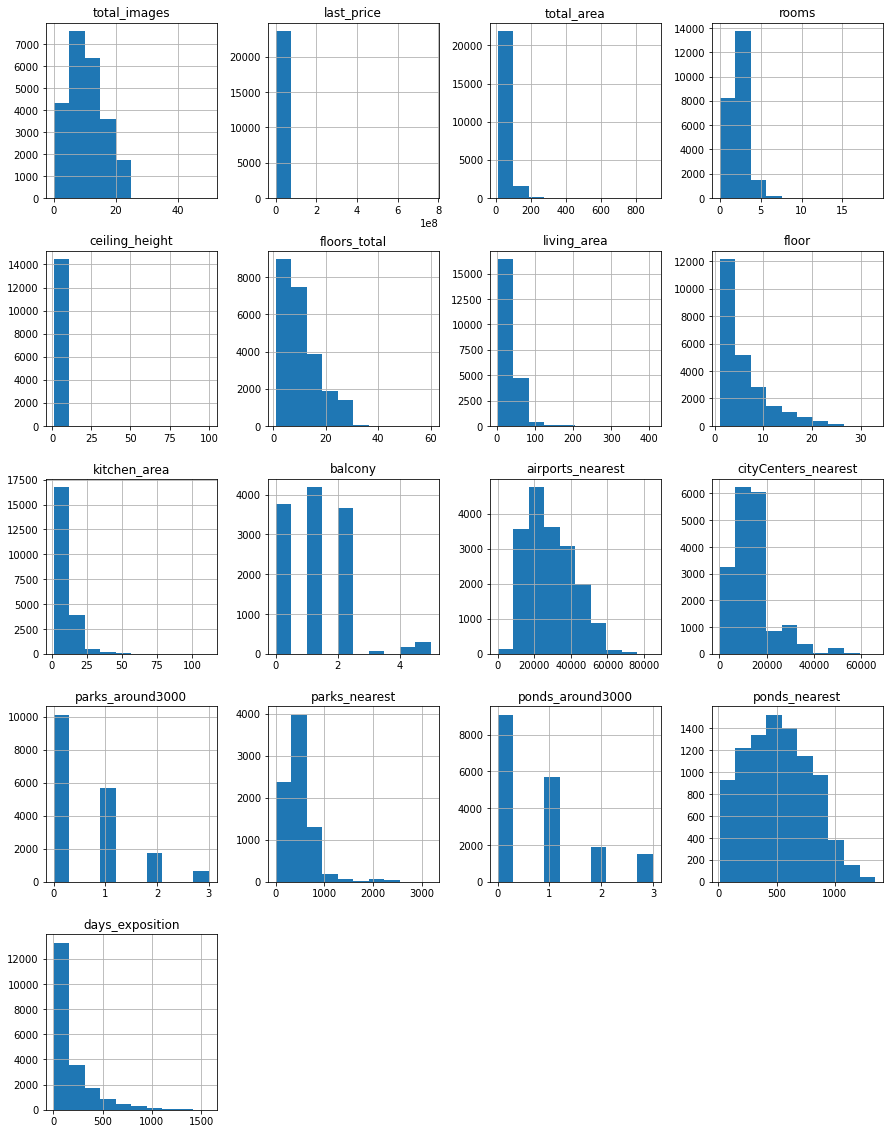

In [4]:
data.hist(figsize=(15,20));

По графикам сейчас сложно сделать вывод о данных. Начнём с предобработки:

### Предобработка данных

**2.1 Переименование столбцов**

Переименуем столбец cityCenters_neares:

In [5]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

**2.2 Обработка пропущенных значений**

Начнём предобработку данных с изучения пропущенных значений в столбцах.\
Для этого выведем количество пропущенных значений в каждом из них:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В следующих столбцах можно заменить пустые значения на предполагаемые:

- апартаменты: пропуск в столбце означает то, что недвижимость не является апартаментами (т.е. False или 0);
- число балконов: пропуск означает отсутствие балкона (укажем 0);
- число парков в радиусе 3 км: пропуск означает отсутствие парков (укажем 0);
- число водоёмов в радиусе 3 км: пропуск означает отсутствие водоёмов (укажем 0)
- сколько дней было размещено объявление (возможно технический сбой, укажем 0).

В этих столбцах нужно сделать проверку:

- площадь кухни: может отсутствовать в квартирах-студиях.

В этих столбцах не указана существенная информация, строки с пропущенными значениями можно удалить:
- название населенного пункта (86 строк);
- всего этажей в доме (49 строк).

В этих столбцах не указаны расстояния, скорее всего расстояния слишком большие, поэтому заполнять пропуски 0 некорректно, оставим Null:
- расстояние до ближайшего аэропорта;
- расстояние до центра города;
- расстояние до ближайшего парка;
- расстояние до ближайшего водоёма.

В остальных столбцах логичную замену предположить невозможно, оставим Null:
- высота потолков (не указано пользователем);
- жилая площадь (не указано пользователем).


In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

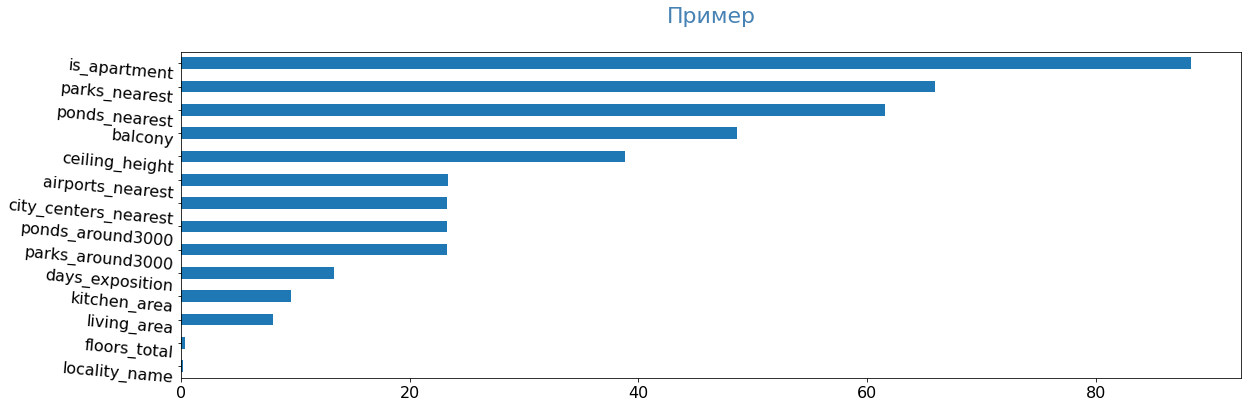

In [8]:
pass_value_barh(data)

Проверим предположение, что площадь кухни не указана только в студиях:

In [9]:
data_without_kitchen = data[data['kitchen_area'].isna()]
print(data_without_kitchen['studio'].unique())

[False  True]


Предположение ошибочное. Скорее всего значения не указаны пользователем, оставляем пропуски не заполненными.

Населённый пункт, количество этажей в доме - важная информация при поиске недвижимости, поэтому пропуски в этом столбцах следует рассматривать как аномалию. Строки составляют менее 1% от всего массива, поэтому можем от них избавиться:

In [10]:
data = data.dropna(subset=['locality_name'])
data = data.dropna(subset=['floors_total'])

Заполним пустые значения в столбцах из первой группы и проверим, просуммировав пустые значения в столбцах:

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пустые значения в оставшихся столбцах оставляем нетронутыми.

**2.3 Преобразование типов данных**

Переходим к типам данных в столбцах. Выведем на экран информацию о датафрейме:

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

У шести столбцов тип данных не соотвествует содержимому:
- 'first_day_exposition' должен иметь тип данных datetime64 (т. к. содержит дату);
- 'is_apartment' - тип bool (т.к. заполнен значениями True/False);
- 'last_price', 'floors_total', 'balcony', 'days_exposition' - должны иметь целочисленный тип данных int64, так как по сути не могут быть дробными.

Изменим тип данных этих столбцов и выведем обновлённую информацию о датафрейме:

In [14]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment']= data['is_apartment'].astype('bool')
data['last_price']= data['last_price'].astype('int64')
data['floors_total']= data['floors_total'].astype('int64')
data['balcony']= data['balcony'].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Теперь столбцы имеют типы данных, соответствующие содержимому.

In [15]:
row = ['last_price','floors_total', 'balcony']

for r in row: 
    data[r]= data[r].astype('int64')

**2.4 Обработка дубликатов**

Для начала проверим количество явных дубликатов:

In [16]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


В предоставленном датафрейме один столбец с названиями и типом object - 'locality_name' (название населённого пункта). Посмотрим уникальные значения этого столбца (поместим в отдельную переменную, чтобы отсортировать по алфавиту):

In [17]:
data_sorted = data.sort_values('locality_name')
print('Количество уникальных названий:', len(data_sorted['locality_name'].unique()))

Количество уникальных названий: 364


In [18]:
print(data_sorted['locality_name'].unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

Создадим столбец, где будут храниться названия без дубликатов. Сначала заменим все "ё" на "е" и "городской поселок" на "поселок городского типа", что сократит количество уникальных значений:

In [19]:
data['locality_name_unique'] = data['locality_name'].str.replace('ё','е')
data['locality_name_unique'] = data['locality_name_unique'].str.replace('городской поселок','поселок городского типа')
data_sorted = data.sort_values('locality_name_unique')
print('Количество уникальных названий:', len(data['locality_name_unique'].unique()))

Количество уникальных названий: 323


Мы встретили повторяющиеся населённые пункты, из которых без проверки можно точно сказать, что они разные: 
- Гарболово (деревня, поселок),
- Зимитицы (деревня, поселок), 
- Калитино (деревня, поселок), 
- Павлово (поселок городского типа, село), 
- Приладожский (поселок городского типа, садовое товарищество), 
- Рахья (поселок городского типа, садовое товарищество),  
- Федоровское (деревня, поселок городского типа),
- Никольское (село, город),
- Щеглово (деревня, поселок).


Проверили остальные населённые пункты, часть из них являются разными:
- Любань (поселок и без указания типа) - поселок и город, разные населённые пункты;
- Рябово (поселок и поселок городского типа) - разные населённые пункты.

Остальные дублируют друг друга:
- Мурино (поселок и без указания типа) - один и тот же населенный пункт (поселок в 2019 году получил статус города);
- Кудрово (деревня и без указания типа) - один и тот же населенный пункт (деревня в 2018 году получила статус города);
- поселок Громово и поселок станции Громово;
- поселок станции Вещево и поселок при железнодорожной станции Вещево;
- поселок станции Приветнинское и поселок при железнодорожной станции Приветнинское.

Объединим дубликаты под одно название:

In [20]:
data['locality_name_unique'] = data['locality_name_unique'].str.replace('деревня Кудрово','Кудрово')
data['locality_name_unique'] = data['locality_name_unique'].str.replace('поселок Мурино','Мурино')
data['locality_name_unique'] = data['locality_name_unique'].str.replace('поселок станции Громово','поселок Громово')
data['locality_name_unique'] = data['locality_name_unique']\
.str.replace('поселок при железнодорожной станции Вещево','поселок станции Вещево')
data['locality_name_unique'] = data['locality_name_unique']\
.str.replace('поселок при железнодорожной станции Приветнинское','поселок станции Приветнинское')

print('Количество уникальных названий:', len(data['locality_name_unique'].unique()))

Количество уникальных названий: 318


После обработки дубликатов из 364 населённых пунктов осталось 318, что упростит дальнейший анализ данных.

In [21]:
# check
data['locality_name_unique'].nunique()

318

**2.5 Устранение аномальных значений**

Вызовем метод .describe(), чтобы получить представление о содержимом в каждом столбце:

In [22]:
# применим формат данных, чтобы убрать экпоненциальную запись:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.00,23565.00,23565.00,23565.00,14481.00,23565.00,21700.00,23565.00,21343.00,23565.00,18041.00,18064.00,23565.00,8030.00,23565.00,9036.00,20394.00
mean,9.88,6540058.26,60.32,2.07,2.77,10.68,34.45,5.88,10.56,0.59,28797.08,14192.66,0.47,490.58,0.59,518.29,180.74
std,5.68,10910934.72,35.66,1.08,1.26,6.59,22.05,4.87,5.90,0.96,12632.50,8613.35,0.75,341.57,0.88,278.01,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.51,5.00,18.60,2.00,7.00,0.00,18565.00,9238.00,0.00,288.00,0.00,293.00,45.00
50%,9.00,4646000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26757.00,13096.50,0.00,455.00,0.00,503.00,95.00
75%,14.00,6790000.00,69.70,3.00,2.80,16.00,42.30,8.00,12.00,1.00,37273.00,16285.00,1.00,612.00,1.00,730.00,231.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Рассмотрим полученное описание к данным:

**2.5.1 Число фотографий квартиры в объявлении (total_images)**

В среднем ≈ 10 шт, 3/4 всех объявлений до 14 шт, похоже на правду. Максимальное количество 50 шт. - число внушительное, но ошибки быть не должно - количество фотографий, скорее всего, подсчитывается автоматически.

**2.5.2 Цена на момент снятия с публикации (last_price)**

Средняя - 6,5 млн руб, минимальная - 12 тыс. руб. (похоже на вброс), максимальная - 763 млн руб. (тоже исключение).
Посмотрим, сколько объявлений в диапазоне до 500 тыс. руб. и свыше 30 млн руб.:

In [23]:
print('Объявления с ценой меньше 500 тыс. руб.:', data.query('last_price < 500000')['last_price'].count())
print('Объявления с ценой больше 30 млн руб.:', data.query('last_price > 30000000')['last_price'].count())

Объявления с ценой меньше 500 тыс. руб.: 14
Объявления с ценой больше 30 млн руб.: 315


Всего 329 объявлений, которые составляют менее 1,4% от всех данных. Удалим эти редкие объявления и выведем гистограмму:

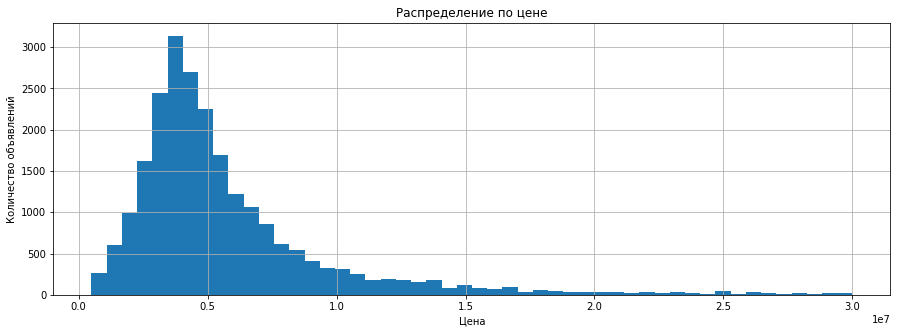

In [24]:
data.drop(data.query('last_price < 500000').index,inplace=True)
data.drop(data.query('last_price > 30000000').index,inplace=True)

data['last_price'].plot(kind='hist', x='last_price', figsize=(15,5), bins=50, grid=True, range=(500000,30000000), \
                        title='Распределение по цене');

plt.xlabel('Цена');
plt.ylabel('Количество объявлений');

**2.5.3 Общая площадь квартиры (м²) (total_area), жилая площадь (м²) (living_area), и площадь кухни (м²) (kitchen_area)**

Сначала обработаем данные исходя из общей площади: в среднем 60 м², 3/4 квартир площадью менее 70 м², данные адекватные. А вот максимальное значение - 900 м² похоже на какой-то редкий экземпляр, не подходящий для статистики, также как и квартиры площадью менее 20 м². Посмотрим количество объявлений с такой площадью:

In [25]:
print('Квартиры площадью менее 20 м²:',data.query('total_area < 20')['total_area'].count())
print('Квартиры площадью более 200 м²:',data.query('total_area > 200')['total_area'].count())

Квартиры площадью менее 20 м²: 27
Квартиры площадью более 200 м²: 95


Таких объектов менее 1%, что можно рассматривать как исключение и удалить строки. Выведем гистограмму для оставшихся данных:

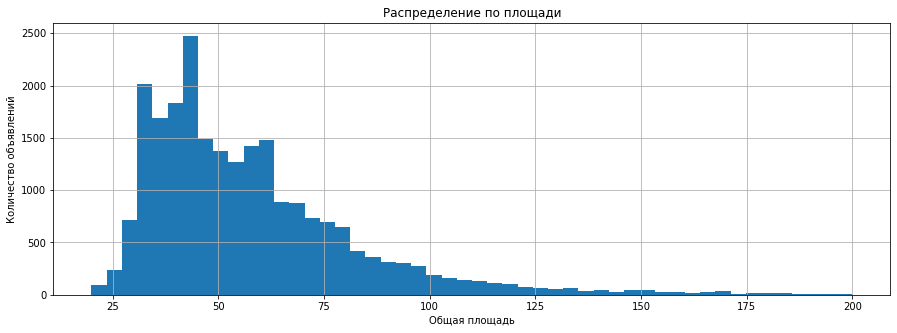

In [26]:
data.drop(data.query('total_area > 200').index,inplace=True)
data.drop(data.query('total_area < 20').index,inplace=True)

data['total_area'].plot(kind='hist', x='total_area', figsize=(15,5), bins=50, grid=True, range=(20,200), \
                        title='Распределение по площади');

plt.xlabel('Общая площадь');
plt.ylabel('Количество объявлений');

Вызовем снова метод .describe(), чтобы увидеть обновленные данные:

In [27]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23114.00,23114.00,23114.00,23114.00,14197.00,23114.00,21309.00,23114.00,20964.00,23114.00,17623.00,17643.00,23114.00,7731.00,23114.00,8717.00,20043.00
mean,9.84,5681238.77,57.53,2.03,2.76,10.74,32.92,5.90,10.26,0.60,28847.83,14377.49,0.45,493.93,0.57,522.54,178.97
std,5.65,3902585.82,25.31,0.99,1.27,6.62,16.85,4.89,5.01,0.96,12734.56,8589.76,0.73,342.29,0.87,277.81,217.54
min,0.00,500000.00,20.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,208.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.50,5.00,18.50,2.00,7.00,0.00,18450.00,9621.50,0.00,290.00,0.00,301.00,45.00
50%,9.00,4600000.00,51.36,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26859.00,13222.00,0.00,456.00,0.00,507.00,94.00
75%,14.00,6600000.00,68.00,3.00,2.80,16.00,42.00,8.00,11.80,1.00,37412.00,16381.00,1.00,614.00,1.00,733.00,228.00
max,50.00,30000000.00,200.00,11.00,100.00,60.00,164.70,33.00,65.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Минимальная жилая площадь равна 2 м², а минимальная площадь кухни - 1,3 м², что большая редкость и скорее ошибка. Большие кухни тоже редкость, поэтому проверим, сколько квартир с жилой площадью менее 10 м², и отдельно - количество квартир с площадью кухни менее 3 м² и более 30 м².

In [28]:
print('Квартиры с жилой площадью  менее 10 м²:',data.query('living_area < 10')['living_area'].count())
print('Квартиры с площадью кухни  менее 3 м²:',data.query('kitchen_area < 3')['living_area'].count())
print('Квартиры с площадью кухни  более 30 м²:',data.query('kitchen_area > 30')['living_area'].count())

Квартиры с жилой площадью  менее 10 м²: 23
Квартиры с площадью кухни  менее 3 м²: 9
Квартиры с площадью кухни  более 30 м²: 206


Таких объявлений менее 1%, можно удалить:

In [29]:
data.drop(data.query('living_area < 10').index,inplace=True)
data.drop(data.query('kitchen_area < 3').index,inplace=True)
data.drop(data.query('kitchen_area > 30').index,inplace=True)

**2.5.4 Число комнат (rooms)**

Остались объявления до 11 комнат, при чем минимальное количество комнат - 0, что похоже на вброс. Выведем количество объявлений "без комнат" и свыше 5 комнат:

In [30]:
print('Квартиры "без комнат":',data.query('rooms < 1')['rooms'].count())
print('Квартиры, где больше 5 комнат:',data.query('rooms > 5')['rooms'].count())

Квартиры "без комнат": 183
Квартиры, где больше 5 комнат: 79


Всего 262 объявления или 1,2%, аномалии можно удалить:

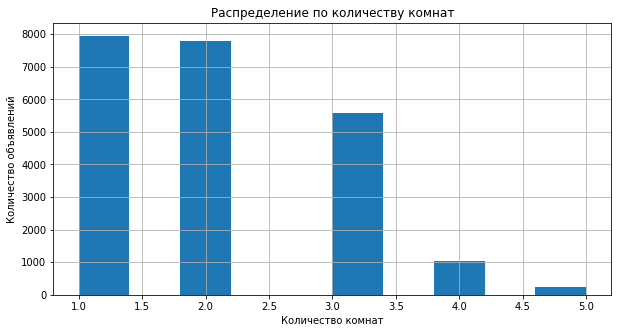

In [31]:
data.drop(data.query('rooms < 1').index,inplace=True)
data.drop(data.query('rooms > 5').index,inplace=True)

data['rooms'].plot(kind='hist', x='rooms', figsize=(10,5), bins=10, grid=True, range=(1,5), \
                        title='Распределение по количеству комнат');

plt.xlabel('Количество комнат');
plt.ylabel('Количество объявлений');

**2.5.5 Высота потолков (м) (ceiling_height)**

Минимальное значение 1 м и максимальное - 100 м не похожи на действительность.
Распределим значения на следующие группы: 
 - до 2,5 м: если редкость - удалить, иначе - изучить;
 - от 4 до 25 м: если редкость - удалить, иначе - изучить;
 - от 25 до 36 м: предположительно опечатка и на самом деле должны быть значения от 2.5 до 3.6 - разделить на 10;
 - от 36 м и выше: если редкость - удалить, иначе - изучить.

In [32]:
print('Квартир с потолками до 2.5 м: ' , str(data.query('ceiling_height < 2.5') \
                                               ['ceiling_height'].count()) , ' шт.')

print('Квартир с потолками от 4 до 25 м: ' , str(data.query('ceiling_height > 4 and ceiling_height < 25') \
                                               ['ceiling_height'].count()) , ' шт.')

print('Квартир с потолками от 25 до 36 м: ' , str(data.query('ceiling_height >= 25 and ceiling_height <= 36') \
                                               ['ceiling_height'].count()) , ' шт.')

print('Квартир с потолками от  36 м: ' , str(data.query('ceiling_height > 36') \
                                               ['ceiling_height'].count()) , ' шт.')

Квартир с потолками до 2.5 м:  73  шт.
Квартир с потолками от 4 до 25 м:  37  шт.
Квартир с потолками от 25 до 36 м:  18  шт.
Квартир с потолками от  36 м:  1  шт.


Приступим к устранению аномалий, удалим значения первой, второй и четвертой группы, преобразуем третью группу и выведем гистограмму:

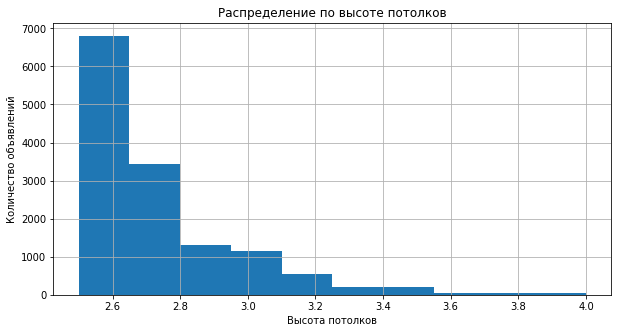

In [33]:
data.drop(data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.drop(data.query('ceiling_height > 36').index,inplace=True)

data.loc[(data['ceiling_height'] >= 25), 'ceiling_height'] = data['ceiling_height']/10


data['ceiling_height'].plot(kind='hist', x='ceiling_height', figsize=(10,5), bins=10, grid=True, range=(2.5,4), \
                        title='Распределение по высоте потолков');

plt.xlabel('Высота потолков');
plt.ylabel('Количество объявлений');

**2.5.6 Всего этажей в доме (floors_total) и этаж (floor)**

Квартиры расположены на этажах с первого по 33: такое может быть, аномалий нет.\
А вот высота домов от 30 до 60 этажей скорее всего редкая, проверим:

In [34]:
print('Количество домов выше 30 этажей:',data.query('floors_total > 30')['floors_total'].count())

Количество домов выше 30 этажей: 29


Удалим объявления в слишком высоких домах и выведем гистограммы:

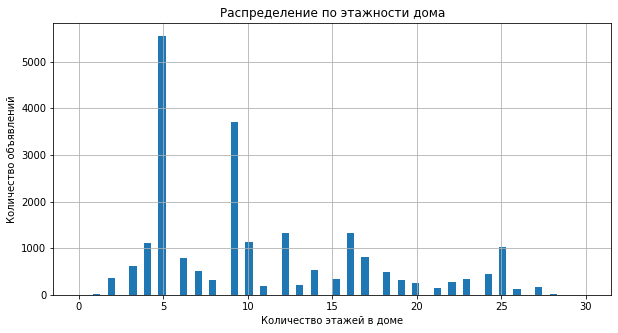

In [35]:
data.drop(data.query('floors_total > 30').index,inplace=True)

#вывод графика по этажности дома

data['floors_total'].plot(kind='hist', x='floors_total', figsize=(10,5), bins=70, grid=True, range=(0,30), \
                        title='Распределение по этажности дома');

plt.xlabel('Количество этажей в доме');
plt.ylabel('Количество объявлений');

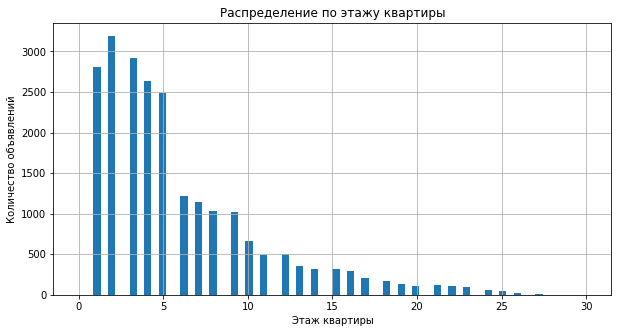

In [36]:
#вывод графика по этажам квартир
data['floor'].plot(kind='hist', x='floor', figsize=(10,5), bins=70, grid=True, range=(0,30), \
                        title='Распределение по этажу квартиры');

plt.xlabel('Этаж квартиры');
plt.ylabel('Количество объявлений');

**2.5.7 Число балконов (balcony)**

Количество балконов от нуля до 5 - может соответствовать действительности.

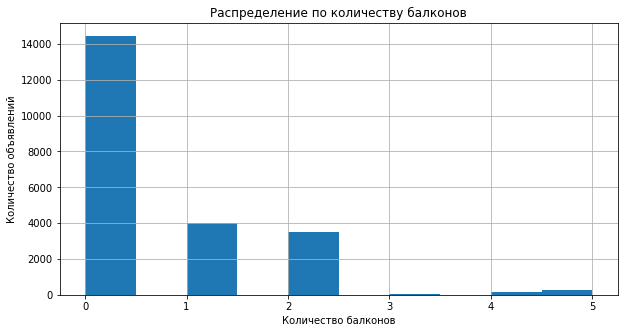

In [37]:
data['balcony'].plot(kind='hist', x='balcony', figsize=(10,5), bins=10, grid=True, range=(0,5), \
                        title='Распределение по количеству балконов');

plt.xlabel('Количество балконов');
plt.ylabel('Количество объявлений');

**2.5.8 Расстояние до ближайшего аэропорта в метрах (airports_nearest)**

Среднее около 27 км, максимум - 85 км, что вполне реально. Посмотрим сколько квартир расположено слишком близко к аэропорту (менее 5 км):

In [38]:
print('Квартиры в менее 5 км от аэропорта:',data.query('airports_nearest < 5000')['airports_nearest'].count())

Квартиры в менее 5 км от аэропорта: 1


Всего один редкий экземпляр, можно удалить:

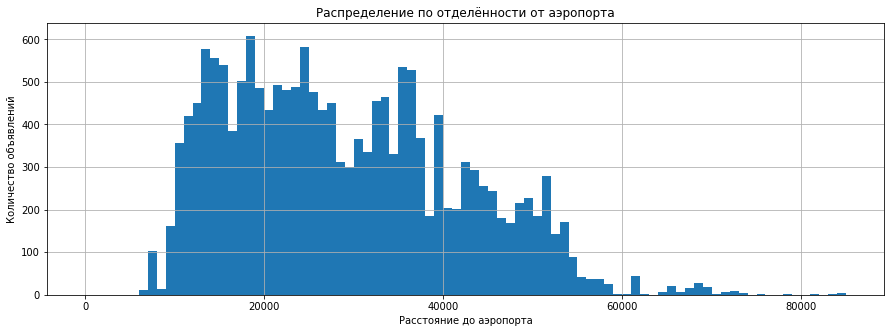

In [39]:
data.drop(data.query('airports_nearest < 5000').index,inplace=True)

data['airports_nearest'].plot(kind='hist', x='airports_nearest', figsize=(15,5), bins=85, grid=True, range=(0,85000), \
                        title='Распределение по отделённости от аэропорта');

plt.xlabel('Расстояние до аэропорта');
plt.ylabel('Количество объявлений');

**2.5.9 Сколько дней было размещено объявление (days_exposition)**

Самое долгое размещение составило 1580 дней. Посмотрим сколько объявлений было размещено более трех лет:

In [40]:
print('Количество не опубликованных объявлений:',data.query('days_exposition == 0')['days_exposition'].count())
print('Количество объявлений, размещённых дольше трёх лет:',data.query('days_exposition > 365*3')['days_exposition'].count())

Количество не опубликованных объявлений: 0
Количество объявлений, размещённых дольше трёх лет: 148


Таких объявлений мало, можно удалить для целей исследования:

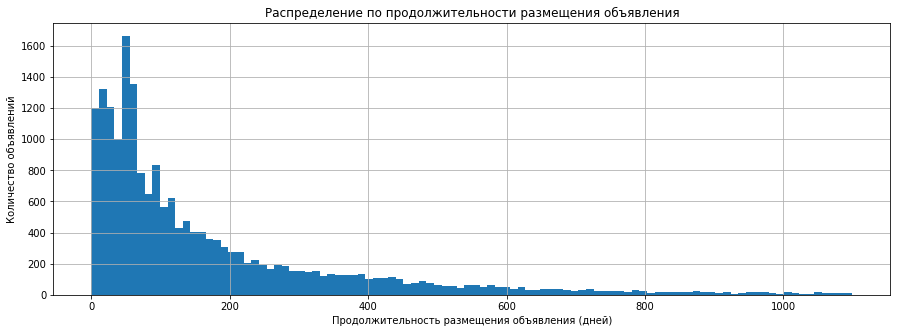

In [41]:
data.drop(data.query('days_exposition > 365*3').index,inplace=True)

data['days_exposition'].plot(kind='hist', x='days_exposition', figsize=(15,5), bins=100, grid=True, range=(0,1100), \
                        title='Распределение по продолжительности размещения объявления');

plt.xlabel('Продолжительность размещения объявления (дней)');
plt.ylabel('Количество объявлений');


**2.5.10 Расстояние до центра города; расстояние до ближайшего парка и водоёма, а также их количество:**

Количество парков и водоёмов в радиусе 3 км соответсвует реальности.
Построим графики для расстояний и определим наличие аномалий:

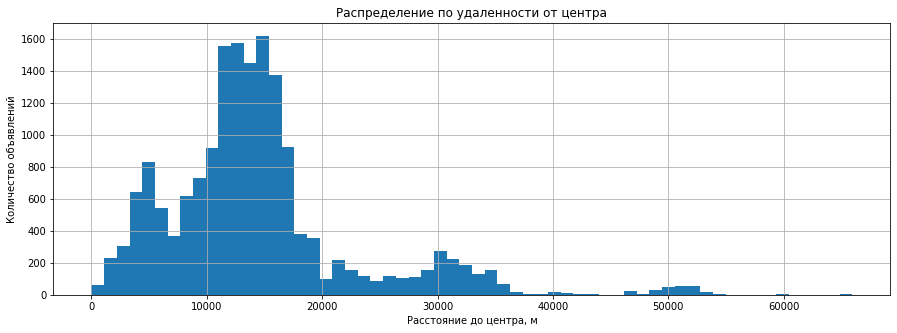

In [42]:
data['city_centers_nearest'].plot(kind='hist', x='city_centers_nearest', figsize=(15,5), bins=60, grid=True, range=(0,65968), \
                        title='Распределение по удаленности от центра');

plt.xlabel('Расстояние до центра, м');
plt.ylabel('Количество объявлений');

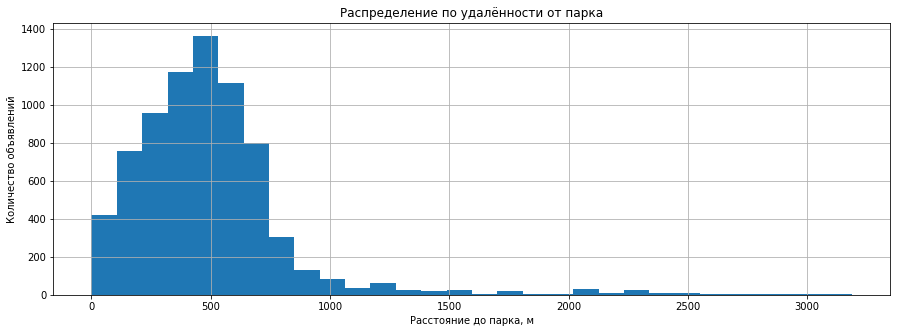

In [43]:
data['parks_nearest'].plot(kind='hist', x='parks_nearest', figsize=(15,5), bins=30, grid=True, range=(0,3190), \
                        title='Распределение по удалённости от парка');

plt.xlabel('Расстояние до парка, м');
plt.ylabel('Количество объявлений');

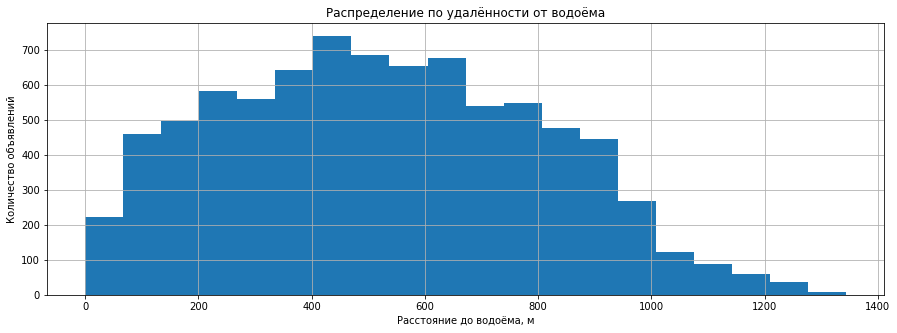

In [44]:
data['ponds_nearest'].plot(kind='hist', x='ponds_nearest', figsize=(15,5), bins=20, grid=True, range=(0,1344), \
                        title='Распределение по удалённости от водоёма');

plt.xlabel('Расстояние до водоёма, м');
plt.ylabel('Количество объявлений');

Аномалии отсутствуют, расстояния адекватные.

Обновим индексы после удаления строк:

In [45]:
data.reset_index(drop=True,inplace=True)

Вызовем метод describe, чтобы увидеть описание датафрейма:

In [46]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22317.00,22317.00,22317.00,22317.00,13657.00,22317.00,20558.00,22317.00,20381.00,22317.00,16974.00,16994.00,22317.00,7407.00,22317.00,8317.00,19374.00
mean,9.84,5546824.63,56.78,2.02,2.71,10.69,32.56,5.87,9.93,0.59,28914.30,14488.12,0.45,493.18,0.56,526.92,170.28
std,5.63,3656786.19,23.72,0.94,0.24,6.53,16.01,4.85,3.99,0.96,12784.52,8579.46,0.73,339.38,0.86,276.96,196.07
min,0.00,500000.00,20.00,1.00,2.50,1.00,10.00,1.00,3.00,0.00,6450.00,208.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.50,5.00,18.50,2.00,7.00,0.00,18399.00,9798.00,0.00,289.50,0.00,306.00,44.00
50%,9.00,4580000.00,51.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,27001.00,13262.00,0.00,456.00,0.00,513.00,93.00
75%,14.00,6500000.00,67.20,3.00,2.80,16.00,41.60,8.00,11.50,1.00,37434.00,16419.00,1.00,616.00,1.00,736.00,222.00
max,50.00,30000000.00,200.00,5.00,4.00,29.00,164.70,27.00,30.00,5.00,84853.00,65952.00,3.00,3190.00,3.00,1344.00,1095.00


**Вывод раздела 2**:
Мы заполнили пустые ячейки, где это возможно, и обработали и удалили аномальные значения. Для анализа оставили квартиры:
- с ценой от 500 тыс. руб. до 30 млн руб.;
- с жилой площадью 20 до 200 кв.м. и площадью кухни от 3 кв.м. до 30 кв.м.;
- от одной до 5-ти комнат;
- с потолками от 2.5 до 3.6 м;
- с расположением более 5 км от аэропорта;
- объявление о продаже которой находилось менее трёх лет.

Из 23699 строк осталось 22317, удалено 5,8% от исходного файла, что некритично для целей исследования.

#### check gap

In [47]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22317 entries, 0 to 22316
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22317 non-null  int64         
 1   last_price            22317 non-null  int64         
 2   total_area            22317 non-null  float64       
 3   first_day_exposition  22317 non-null  datetime64[ns]
 4   rooms                 22317 non-null  int64         
 5   ceiling_height        13657 non-null  float64       
 6   floors_total          22317 non-null  int64         
 7   living_area           20558 non-null  float64       
 8   floor                 22317 non-null  int64         
 9   is_apartment          22317 non-null  bool          
 10  studio                22317 non-null  bool          
 11  open_plan             22317 non-null  bool          
 12  kitchen_area          20381 non-null  float64       
 13  balcony         

In [48]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,317.00","22,317.00","13,657.00","19,374.00","22,317.00","20,558.00","20,381.00","22,317.00","22,317.00"
min,1.00,20.00,2.50,1.00,"500,000.00",10.00,3.00,1.00,1.00
max,5.00,200.00,4.00,"1,095.00","30,000,000.00",164.70,30.00,27.00,29.00


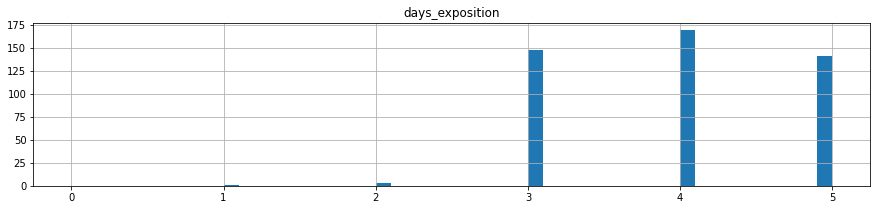

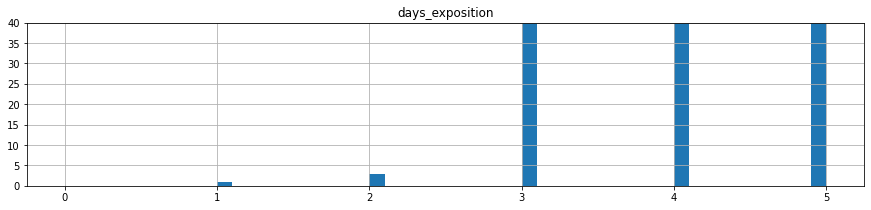

In [49]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Выполнен достойный объем работы, остались аномалии и редкости (в т.ч. и хвосты) в колонках: 
        
        'days_exposition', 'kitchen_area', 'floors_total'
        
стоит учесть наличие пропусков при фильтрации данных

In [50]:
# check
# Моды на реальных данных
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [51]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


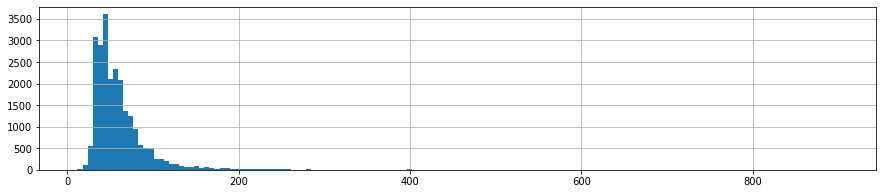

In [52]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

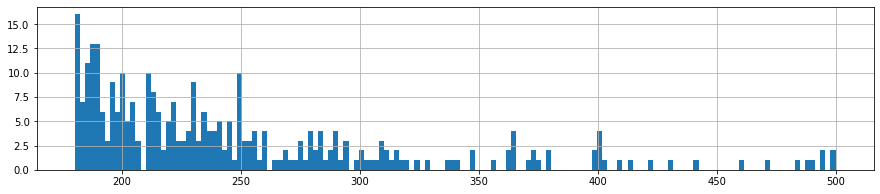

In [53]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

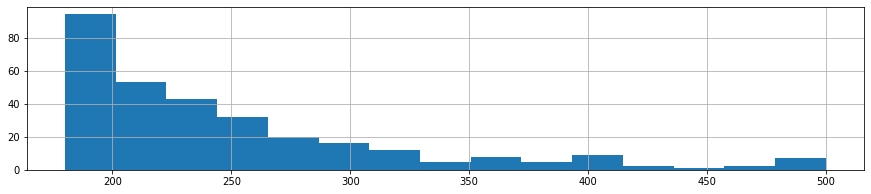

In [54]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

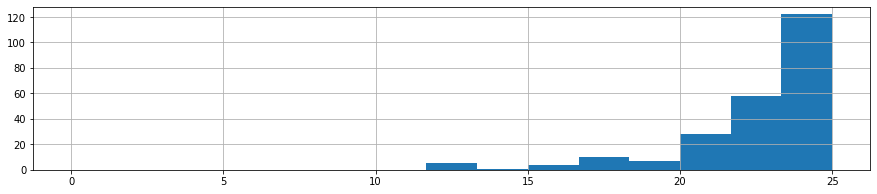

In [55]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [56]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,22.00,2.50,3.00,"600,000.00",10.00,4.00,1.00,2.00
0.01,1.00,27.92,2.50,4.00,"1,000,000.00",13.30,5.00,1.00,2.00
0.5,2.00,51.00,2.65,93.00,"4,580,000.00",30.00,9.00,4.00,9.00
0.99,5.00,144.00,3.60,919.27,"20,983,600.00",88.00,25.00,22.00,26.00
0.9988,5.00,180.91,4.00,"1,077.00","28,177,652.00",117.20,30.00,26.00,27.00


In [57]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df_check[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"562,188.00",10.00,3.77,1.00,2.00
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.21,3.83,"1,068.66","36,000,000.00",120.00,35.09,23.00,26.00
0.9988,8.00,380.00,25.00,"1,369.90","124,772,448.00",219.69,60.00,26.00,35.00


### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу следующие столбцы:

- Цена одного квадратного метра: 

In [58]:
data['price_per_m2'] = data['last_price'] / data['total_area']

- День публикации объявления:

In [59]:
data['weekday_of_exposition'] = data['first_day_exposition'].dt.weekday

- Месяц публикации объявления:

In [60]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month

- Год публикации объявления:

In [61]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year

- Тип этажа квартиры (присвоим тип "другой", "первый", "последний" и сверим количество квартир на первом этаже с квартирами, тип которых мы указали как "первый"):

In [62]:
data.loc[:,'type_of_floor'] = 'другой'
data.loc[data['floor'] == 1,'type_of_floor'] = 'первый'
data.loc[(data['floor'] == data['floors_total'])&(data['floor'] != 1),'type_of_floor'] = 'последний'

print('Количество квартир на первом этаже:',data.query('floor == 1')['floor'].count())
print('Количество квартир, тип этажа которых - первый:',data.query('type_of_floor == "первый"')['type_of_floor'].count())

Количество квартир на первом этаже: 2793
Количество квартир, тип этажа которых - первый: 2793


- Расстояние в км от центра города

In [63]:
data['city_centers_km'] = (data['city_centers_nearest'] / 1000).round(0)

Выведем первые 10 строк:

In [64]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_per_m2,weekday_of_exposition,month_of_exposition,year_of_exposition,type_of_floor,city_centers_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0.00,NaN,81.00,поселок Шушары,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,2015,другой,14.00
3,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0.00,NaN,55.00,поселок городского типа Янино-1,95065.79,0,9,2018,другой,NaN
4,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0.00,NaN,155.00,поселок Парголово,99195.71,3,11,2017,другой,19.00
5,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0.00,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.00
6,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0.00,NaN,189.00,Мурино,87454.76,2,5,2018,другой,NaN
7,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.00,NaN,289.00,Санкт-Петербург,88524.59,6,2,2017,другой,15.00
8,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2.00,553.00,137.00,Санкт-Петербург,127525.25,3,11,2017,другой,14.00
9,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0.00,NaN,7.00,Ломоносов,75000.00,0,8,2018,другой,52.00


**Вывод раздела 3:** в таблицу добавлены новые столбцы для дальнейшего исследования.

### Проведите исследовательский анализ данных

**4.1 Изучим параметры объектов:**

- Общая площадь: пик приходится на площадь до 50 м², а медиана - на 51 м², но за счёт элитной недвижимости (с большой площадью свыше 100 м²), средняя площадь составляет 57 м². Данные соответствуют реальности.

count   22317.00
mean       56.78
std        23.72
min        20.00
25%        40.00
50%        51.00
75%        67.20
max       200.00
Name: total_area, dtype: float64


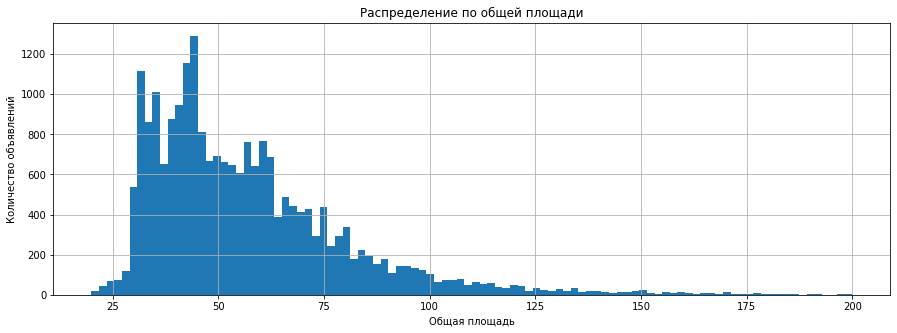

In [65]:
print(data['total_area'].describe())

data['total_area'].plot(kind='hist', x='total_area', figsize=(15,5), bins=100, grid=True, \
                        title='Распределение по общей площади');

plt.xlabel('Общая площадь');
plt.ylabel('Количество объявлений');

- Жилая площадь: как и в графике, отражающем жилую площадь, с ростом площади плавно снижается количество объявлений, её представляющую. Однако, график более "крутой", возможно, это связано с тем, что в квартирах с очень большой площадью, соотношений жилой/нежилой площади увеличивается (люди могут себе позволить больше нежилого пространства). Ещё на графике видно два пика: до 20 м² и около 30 м². Возможно, это связано с продажей квартир в новостройках на окраинах с новой "минималистичной" планировкой.

count   20558.00
mean       32.56
std        16.01
min        10.00
25%        18.50
50%        30.00
75%        41.60
max       164.70
Name: living_area, dtype: float64


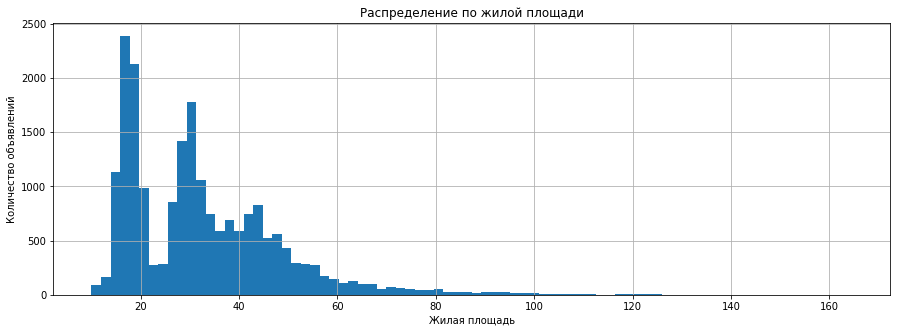

In [66]:
print(data['living_area'].describe())

data['living_area'].plot(kind='hist', x='living_area', figsize=(15,5), bins=80, grid=True,\
                         title='Распределение по жилой площади');

plt.xlabel('Жилая площадь');
plt.ylabel('Количество объявлений');

- Площадь кухни: аналогично графикам выше, пик находится раньше среднего (10 м²) и ещё более резко снижается к концу.

count   20381.00
mean        9.93
std         3.99
min         3.00
25%         7.00
50%         9.00
75%        11.50
max        30.00
Name: kitchen_area, dtype: float64


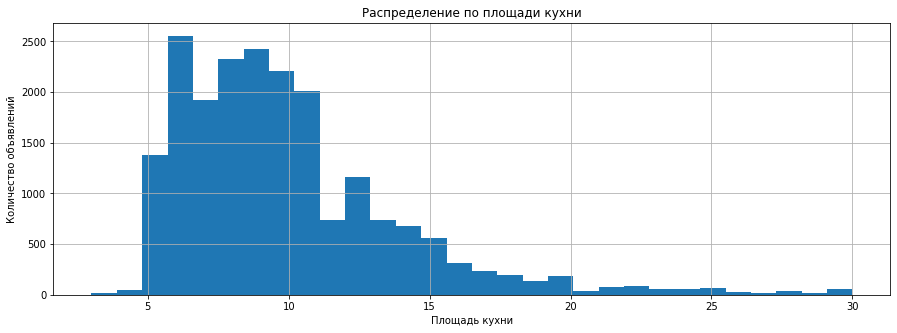

In [67]:
print(data['kitchen_area'].describe())


data['kitchen_area'].plot(kind='hist', x='kitchen_area', figsize=(15,5), bins=30, grid=True, \
                        title='Распределение по площади кухни');

plt.xlabel('Площадь кухни');
plt.ylabel('Количество объявлений');

- Цена объекта: пик появляется чуть раньше среднего за счёт длинного "хвоста", который плавно уходит в сторону дорогостоящей недвижимости. Данные выглядят соответствующе реальности.

count      22317.00
mean     5546824.63
std      3656786.19
min       500000.00
25%      3400000.00
50%      4580000.00
75%      6500000.00
max     30000000.00
Name: last_price, dtype: float64


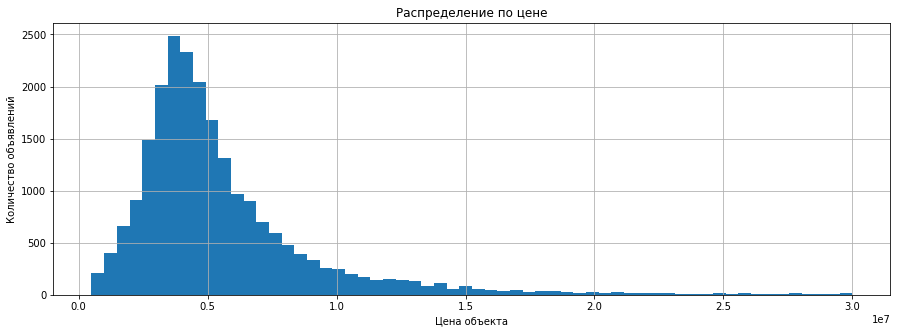

In [68]:
print(data['last_price'].describe())

data['last_price'].plot(kind='hist', x='last_price', figsize=(15,5), bins=60, grid=True, title='Распределение по цене');

plt.xlabel('Цена объекта');
plt.ylabel('Количество объявлений');

- Количество комнат - подавляющее большинство и примерно одинаковое количество приходится на одно- и двухкомнатные квартиры, что вполне объяснимо: их больше, как следствие и объявлений больше.

count   22317.00
mean        2.02
std         0.94
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         5.00
Name: rooms, dtype: float64


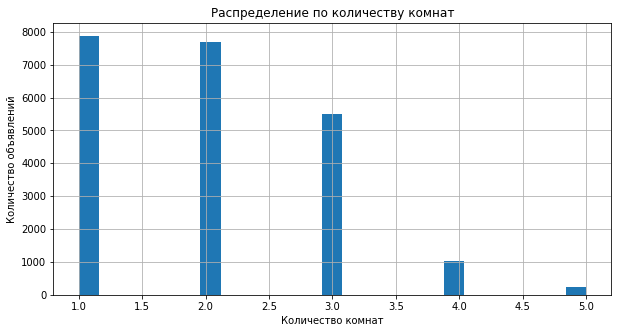

In [69]:
print(data['rooms'].describe())

data['rooms'].plot(kind='hist', x='last_price', figsize=(10,5), bins=25, grid=True, title='Распределение по количеству комнат');

plt.xlabel('Количество комнат');
plt.ylabel('Количество объявлений');

- Высота потолков - пик и среднее приходятся на 2.5-2.7 м, что соотвествует современной застройке.

count   13657.00
mean        2.71
std         0.24
min         2.50
25%         2.50
50%         2.65
75%         2.80
max         4.00
Name: ceiling_height, dtype: float64


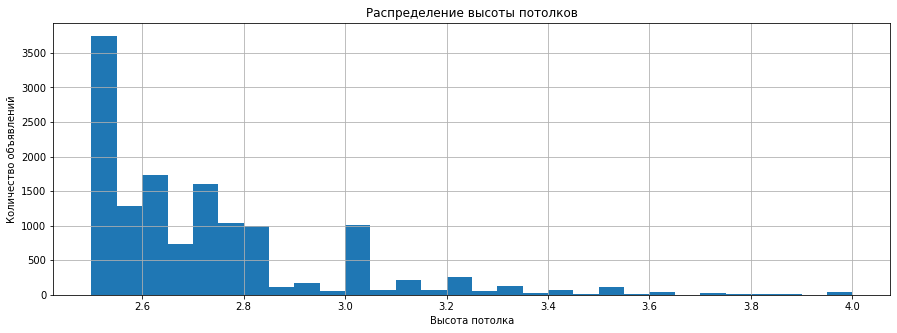

In [70]:
print(data['ceiling_height'].describe())

data['ceiling_height'].plot(kind='hist', x='ceiling_height', figsize=(15,5), bins=30, grid=True,\
                            title='Распределение высоты потолков');

plt.xlabel('Высота потолка');
plt.ylabel('Количество объявлений');

- Этаж квартиры - большинство квартир находятся с первого по пятый этаж, это также видно из описания данных к столбцу: 50% всех квартир находятся на 1-4 этажах.

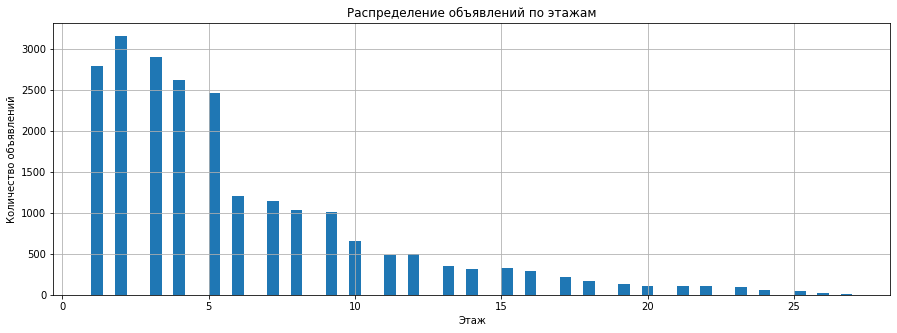

In [71]:
data['floor'].plot(kind='hist', x='floor', figsize=(15,5), bins=65, grid=True,\
                            title='Распределение объявлений по этажам');

plt.xlabel('Этаж');
plt.ylabel('Количество объявлений');

- Тип этажа квартиры: на первом и последнем этажах расположено примерно одинаковое количество квартир, небольшое, по сравнению с количеством квартир на других этажах.

другой       16409
последний     3115
первый        2793
Name: type_of_floor, dtype: int64


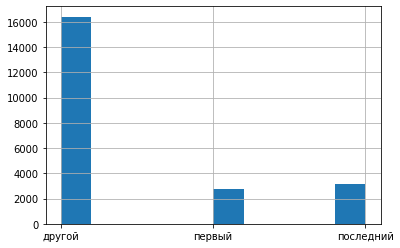

In [72]:
print(data['type_of_floor'].value_counts())
data['type_of_floor'].hist();

- Общее количество этажей в доме: редкие квартиры из объявлений располагаются в зданиях с количеством этажей от 30-ти до 60-ти, поэтому выведем график до 30-ти этажей, чтобы было видно пики, которые приходятся на 5 и 9 этажей (стандартная застройка).

count   22317.00
mean       10.69
std         6.53
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        29.00
Name: floors_total, dtype: float64


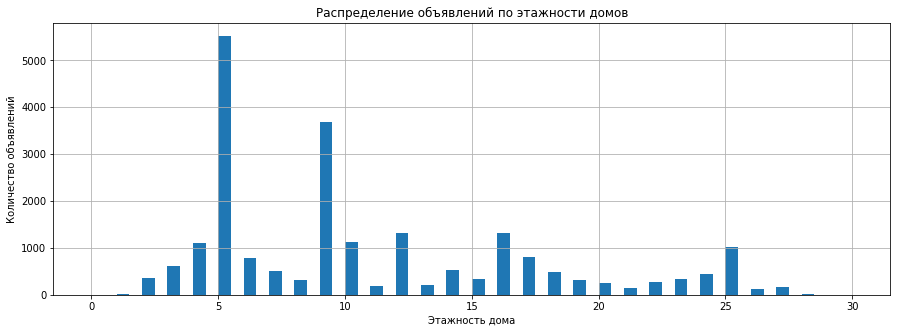

In [73]:
print(data['floors_total'].describe())

data['floors_total'].plot(kind='hist', x='floors_total', figsize=(15,5), bins=60, range=(0,30), grid=True,\
                            title='Распределение объявлений по этажности домов');

plt.xlabel('Этажность дома');
plt.ylabel('Количество объявлений');

- Расстояние до центра города в метрах - пик примерно совпадает со средней и медианой и располагается от 11-ти до 16-ти км. Есть ещё два незначительных пика - в 30-ти и 50-ти км от центра (скорее всего два больших, но отдаленных населённых пункта).

count   16994.00
mean    14488.12
std      8579.46
min       208.00
25%      9798.00
50%     13262.00
75%     16419.00
max     65952.00
Name: city_centers_nearest, dtype: float64


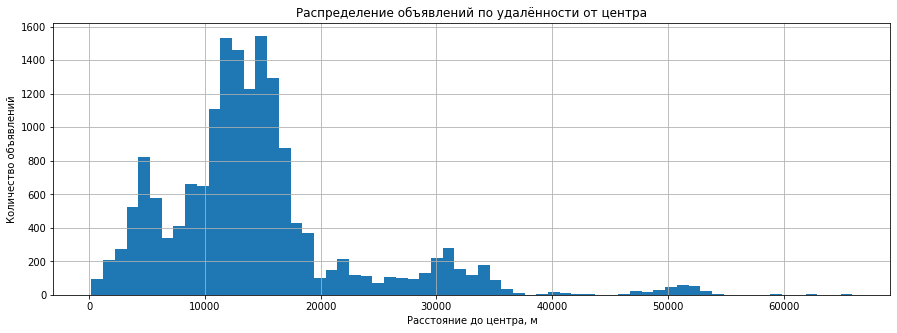

In [74]:
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].plot(kind='hist', x='city_centers_nearest', figsize=(15,5), bins=65, grid=True,\
                            title='Распределение объявлений по удалённости от центра');

plt.xlabel('Расстояние до центра, м');
plt.ylabel('Количество объявлений');


- Расстояние до ближайшего аэропорта - здесь бОльшая часть расположена на расстоянии от 10-ти до 40-ка км до аэропорта: 

count   16974.00
mean    28914.30
std     12784.52
min      6450.00
25%     18399.00
50%     27001.00
75%     37434.00
max     84853.00
Name: airports_nearest, dtype: float64


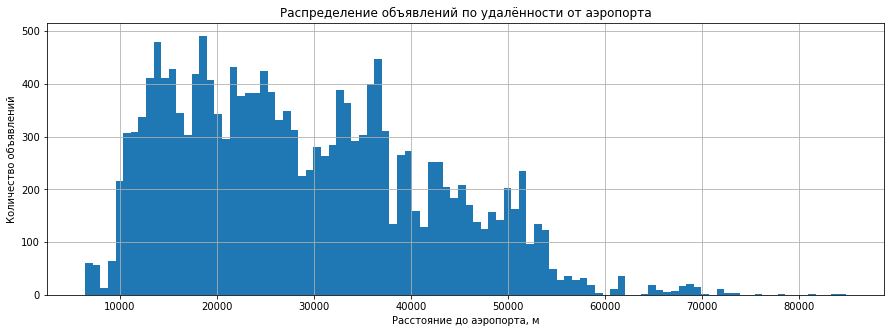

In [75]:
print(data['airports_nearest'].describe())
data['airports_nearest'].plot(kind='hist', x='airports_nearest', figsize=(15,5), bins=100, grid=True,\
                            title='Распределение объявлений по удалённости от аэропорта');

plt.xlabel('Расстояние до аэропорта, м');
plt.ylabel('Количество объявлений');


- Расстояние до ближайшего парка - с большинства квартир можно попасть в парк, пройдя не более 750 м. Квартир, отдалённых от парка более чем на 1 км, очень мало.

count   7407.00
mean     493.18
std      339.38
min        1.00
25%      289.50
50%      456.00
75%      616.00
max     3190.00
Name: parks_nearest, dtype: float64


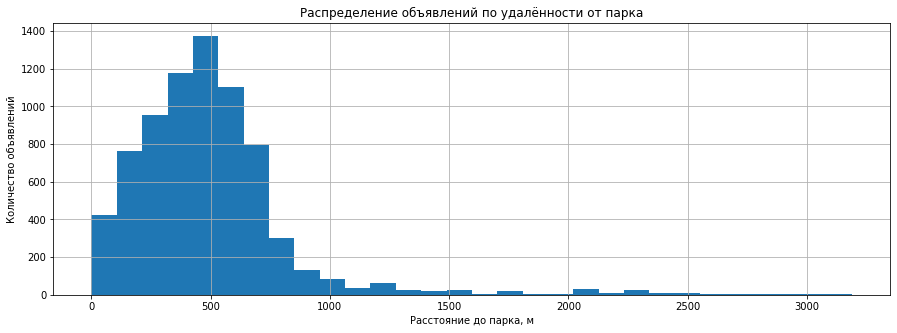

In [76]:
print(data['parks_nearest'].describe())

data['parks_nearest'].plot(kind='hist', x='parks_nearest', figsize=(15,5), bins=30, grid=True,\
                            title='Распределение объявлений по удалённости от парка');

plt.xlabel('Расстояние до парка, м');
plt.ylabel('Количество объявлений');

- День публикации объявления - на графике хорошо видно, что в выходные объявления публикуются значительно реже, а среди будней реже всего - в понедельник.

6    1593
5    1846
0    3410
2    3733
4    3778
1    3948
3    4009
Name: weekday_of_exposition, dtype: int64


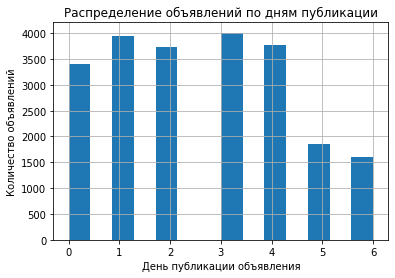

In [77]:
print(data['weekday_of_exposition'].value_counts().sort_values())

data['weekday_of_exposition'].plot(kind='hist', x='weekday_of_exposition', bins=14, grid=True,\
                            title='Распределение объявлений по дням публикации');

plt.xlabel('День публикации объявления');
plt.ylabel('Количество объявлений');

- Месяц публикации объявления - чаще всего публикуются объявления с февраля по апрель (возможно, люди чаще переезжают в весенне-летнее время, поэтому первый этап переезда - выставление объявления о продаже квартиры - чаще приходится на февраль), ещё один пик приходится на осень. Реже всего - январь, май и декабрь.

5     1189
1     1401
12    1530
7     1577
8     1649
6     1677
9     1867
10    2020
11    2232
4     2244
3     2439
2     2492
Name: month_of_exposition, dtype: int64


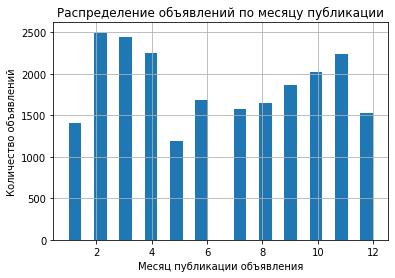

In [78]:
print(data['month_of_exposition'].value_counts().sort_values())

data['month_of_exposition'].plot(kind='hist', x='month_of_exposition', bins=24, grid=True,\
                            title='Распределение объявлений по месяцу публикации');

plt.xlabel('Месяц публикации объявления');
plt.ylabel('Количество объявлений');

**4.2 Скорость продажи квартир**

С помощью данных в столбце days_exposition, определим как быстро продавались квартиры. Сначала посмотрим описание данных столбца, в том числе среднюю и медиану:

count   19374.00
mean      170.28
std       196.07
min         1.00
25%        44.00
50%        93.00
75%       222.00
max      1095.00
Name: days_exposition, dtype: float64


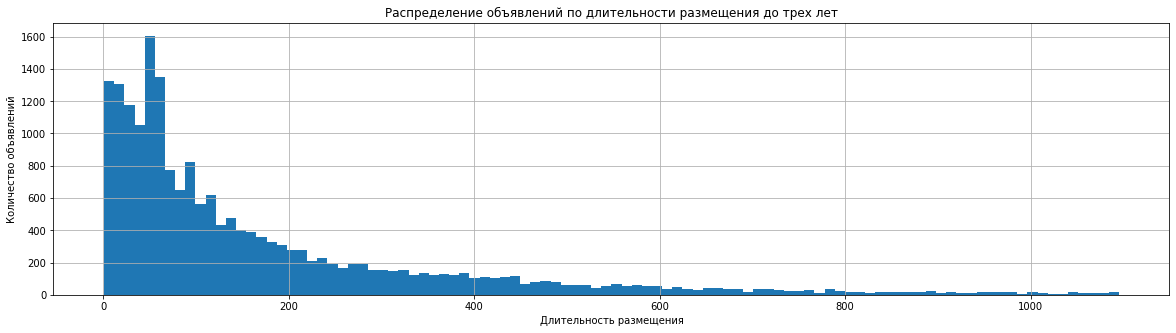

In [79]:
print(data['days_exposition'].describe())

data['days_exposition'].plot(kind='hist', x='days_exposition', bins=100, figsize=(20,5), grid=True,\
                            title='Распределение объявлений по длительности размещения до трех лет');

plt.xlabel('Длительность размещения');
plt.ylabel('Количество объявлений');

Средняя равна 170 дней, медиана - 93. Такое различие обусловлено длинным "хвостом", который тянется к объявлениям, снятым от полугода до трех лет. 

Около половины всех объявлений были сняты до трёх месяцев, ещё четверть - от трёх месяцев до семи, остальные 25% - от семи месяцев до трех лет. Поэтому "быстрой" продажей можно назвать продажу до 45 дней, "нормальной" - от 45 до 180 дней, "длительной" - от 180 дней и выше.

Рассмотрим подробнее продажи до трёх месяцев на графике:

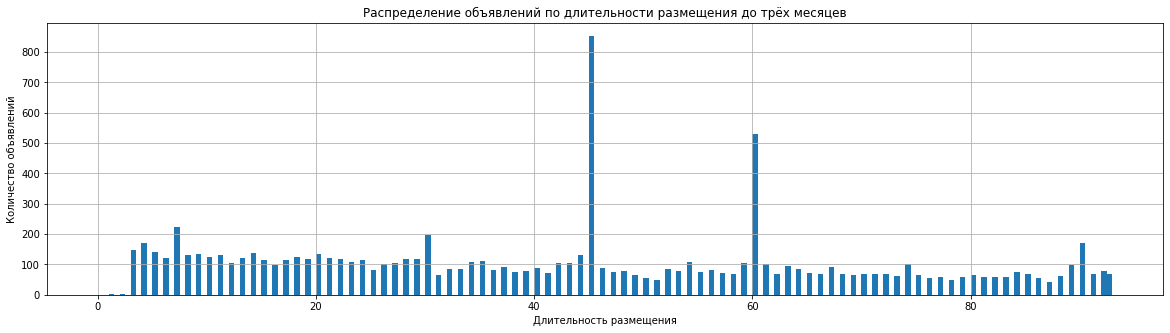

In [80]:
data['days_exposition'].plot(kind='hist', x='days_exposition', bins=186, figsize=(20,5), range=(0,93), grid=True,\
                            title='Распределение объявлений по длительности размещения до трёх месяцев');

plt.xlabel('Длительность размещения');
plt.ylabel('Количество объявлений');

На графике видно два пика: 45 дней и 60 дней. Это обусловлено условиями размещения объявлений: до 4,5 млн можно бесплатно размещать 45 дней, от 4,5 млн до 10 млн - 60 дней, от 10 млн до 90 дней (тоже видно небольшой пик).

Выведем среднюю продолжительность публикации по годам:

In [81]:
pd.pivot_table(data, index='year_of_exposition', values='days_exposition')

,days_exposition
year_of_exposition,
2014,747.97
2015,573.76
2016,318.51
2017,157.80
2018,94.03
2019,30.76


Согласно таблице выше, из года в год средняя продолжительность продаж идёт на снижение, что может быть обусловлено как ситуацией на рынке, улучшением работы сервиса, так и ограничением бесплатного периода публикации объявления.

**4.3 Факторы, влияющие на стоимость объекта**

Проверим, какие факторы влияют на стоимость объекта. Так как разброс данных по площади (общая площадь, жилая площадь, площадь кухни) большой, для начала построим графики рассеяния зависимости стоимости от этих критериев:

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

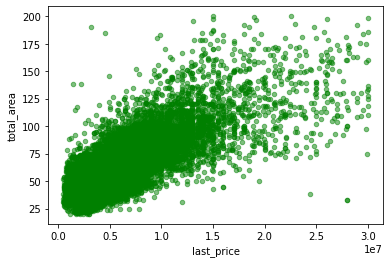

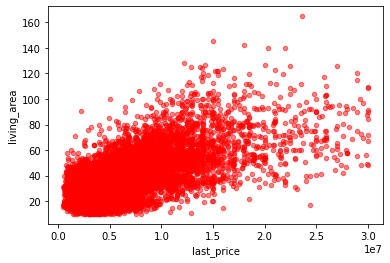

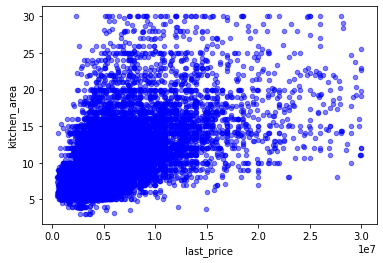

In [82]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5, color = 'g')
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.5, color = 'r')
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5, color = 'b')

На графике видно прямопропорциональную зависимость, сильнее всего - от общей площади. Проверим с помощью коэффициента корреляции:

In [83]:
print('Коэффициент корреляции между общей площадью и стоимостью:', (data['last_price'].corr(data['total_area'])).round(3))
print('Коэффициент корреляции между жилой площадью и стоимостью:', (data['last_price'].corr(data['living_area'])).round(3))
print('Коэффициент корреляции между площадью кухни и стоимостью:', (data['last_price'].corr(data['kitchen_area'])).round(3))

Коэффициент корреляции между общей площадью и стоимостью: 0.772
Коэффициент корреляции между жилой площадью и стоимостью: 0.668
Коэффициент корреляции между площадью кухни и стоимостью: 0.566


Предположение подтвердилось: стоимость квартиры прямо зависит от общей площади квартиры.

Проверим зависимость стоимости от других критериев, принимающих целые значения: количество комнат, этаж, от дня / месяца / года размещения объявления:

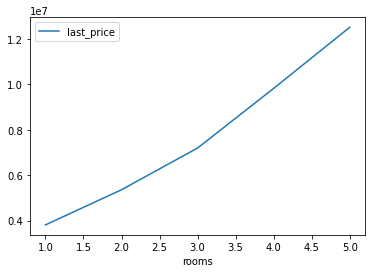

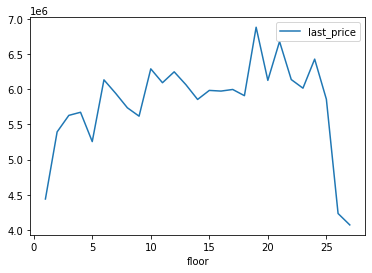

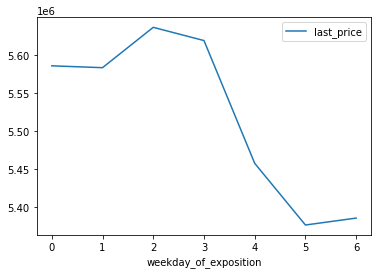

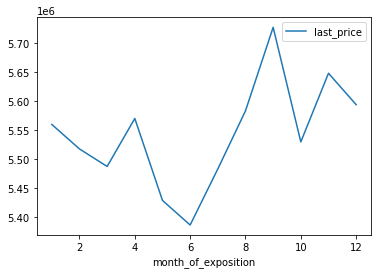

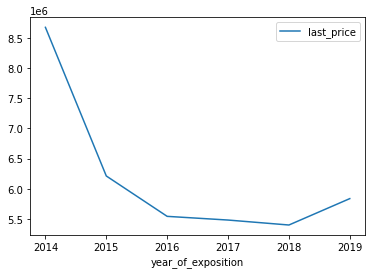

In [84]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='line');
data.pivot_table(index='floor',values='last_price').plot(y='last_price', kind='line');
data.pivot_table(index='weekday_of_exposition',values='last_price').plot(y='last_price', kind='line');
data.pivot_table(index='month_of_exposition',values='last_price').plot(y='last_price', kind='line');
data.pivot_table(index='year_of_exposition',values='last_price').plot(y='last_price', kind='line');

На первый взгляд есть прямая зависимость между стоимостью и количеством комнат, и обратная зависимость между стоимостью и годом размещения объявления. Проверим с помощью коэффициентов корреляции:

In [85]:
print('Коэффициент корреляции между количеством комнат и стоимостью:', (data['last_price'].corr(data['rooms'])).round(3))
print('Коэффициент корреляции между годом и стоимостью:', (data['last_price'].corr(data['year_of_exposition'])).round(3))

Коэффициент корреляции между количеством комнат и стоимостью: 0.477
Коэффициент корреляции между годом и стоимостью: -0.021


Есть слабая зависимость между количеством комнат и стоимостью квартиры (что в принципе логично, ведь чем больше комнат => тем больше площадь (чаще всего, но не всегда) => тем больше стоимость). Продолжим исследовать зависимость стоимости от года размещения объявления. 

In [86]:
pd.pivot_table(data, index='year_of_exposition', values=['last_price', 'total_area'], aggfunc=['mean','count']).reset_index()

year_of_exposition       mean                 count           
                     last_price total_area last_price total_area
0               2014 8677020.64      77.24         88         88
1               2015 6212281.24      63.24        974        974
2               2016 5542746.69      58.14       2624       2624
3               2017 5481489.55      57.01       7753       7753
4               2018 5399180.38      55.49       8137       8137
5               2019 5836869.38      55.70       2741       2741

Исходя из сводной таблицы, можно сделать следующие выводы: 
1. Количество объявлений растёт с каждым годом, однако за 2019 год, возможно, данные представлены за неполный год. Проверим:

In [87]:
pd.pivot_table(data, index='year_of_exposition', columns=['month_of_exposition'], values=['last_price'],\
               aggfunc=['count']).reset_index()

year_of_exposition      count                        \
                                       last_price                         
month_of_exposition                             1       2      3      4   
0                                 2014        NaN     NaN    NaN    NaN   
1                                 2015      43.00   43.00  78.00  42.00   
2                                 2016     112.00  242.00 329.00 395.00   
3                                 2017     279.00  408.00 206.00 606.00   
4                                 2018     568.00 1270.00 983.00 286.00   
5                                 2019     399.00  529.00 843.00 915.00   

                                                                              
                                                                              
month_of_exposition      5      6      7      8      9     10      11     12  
0                      NaN    NaN    NaN    NaN    NaN    NaN   11.00  77.00  
1                    54.00  82.00  79.00  77.00  66.00 135.00  138.00 137.00  
2                   410.00 436.00 135.00  87.00 115.00 119.00  127.00 117.00  
3                   530.00 652.00 537.00 700.00 944.00 887.00 1156.00 848.00  
4                   140.00 507.00 826.00 785.00 742.00 879.00  800.00 351.00  
5                    55.00    NaN    NaN    NaN    NaN    NaN     NaN    NaN

Действительно, архив собран начиная с ноября 2014 года до мая 2019 года. Поэтому за период 2015-2018 гг. предположение верное: с каждым годом количество объявлений растёт.

2. Площадь продаваемых объектов снижалась с 2014 года, однако с 2016 по 2019 изменилась незначительно. Выше мы подтвердили, что площадь квартиры напрямую влияет на стоимость объекта, а в связи с тем, что с годами средняя площадь постепенно снижется, следовательно, снижается и средняя стоимость квартиры. Таким образом, можно подтвердить, что  год публикации объявления влияет на стоимость объекта **косвенно**.

**4.4 Цена квадратного метра в разных населённых пунктах**

Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [88]:
#создаём таблицу объявлений по населённым пунтам, которая включает в себя:
#сумму стоимости квартир, сумму площади квартир, а также кол-во объявлений:
price_m2_in_location = data.pivot_table(index='locality_name_unique', values=['last_price','total_area'], \
                                        aggfunc=['sum','count'])
#избавляемся от "двухэтажных" названий
price_m2_in_location.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']

#сортируем по убыванию количества объявлений
price_m2_in_location.sort_values(by=['last_price_count'],ascending=False, inplace=True)

#оставляем первые 10 населённых пунктов
price_m2_in_location = price_m2_in_location.head(10)

#добавляем столбец со средней ценой квадратного метра в каждом населённом пункте:
price_m2_in_location['price_m2'] = price_m2_in_location['last_price_sum']/price_m2_in_location['total_area_sum']

price_m2_in_location.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count','price_m2']


#сортируем по убыванию цены за квадратный метр:
price_m2_in_location.sort_values(by=['price_m2'],ascending=False, inplace=True)
print(price_m2_in_location)

                      last_price_sum  total_area_sum  last_price_count  \
locality_name_unique                                                     
Санкт-Петербург          96973766502       872999.99             14635   
Пушкин                    2114647964        20181.10               350   
Кудрово                   1968354660        20974.42               444   
поселок Парголово         1442845459        16455.97               320   
Мурино                    2073652700        24959.22               555   
поселок Шушары            1780555999        23357.96               432   
Колпино                   1294830246        17539.32               335   
Гатчина                   1058219360        15498.48               306   
Всеволожск                1480399965        21895.83               387   
Выборг                     730493000        12821.56               232   

                      total_area_count  price_m2  
locality_name_unique                              
Санкт-Пет

Мы получили 10 населённых пунктов с самым большим количеством объявлений и отсортировали по стоимости за квадратный метр. Из них:

Самая высокая цена за квадратный метр в населённом пункте  locality_name_unique
Санкт-Петербург   111081.06
Name: price_m2, dtype: float64

Самая низкая цена за квадратный метр в населённом пункте  locality_name_unique
Выборг   56973.80
Name: price_m2, dtype: float64


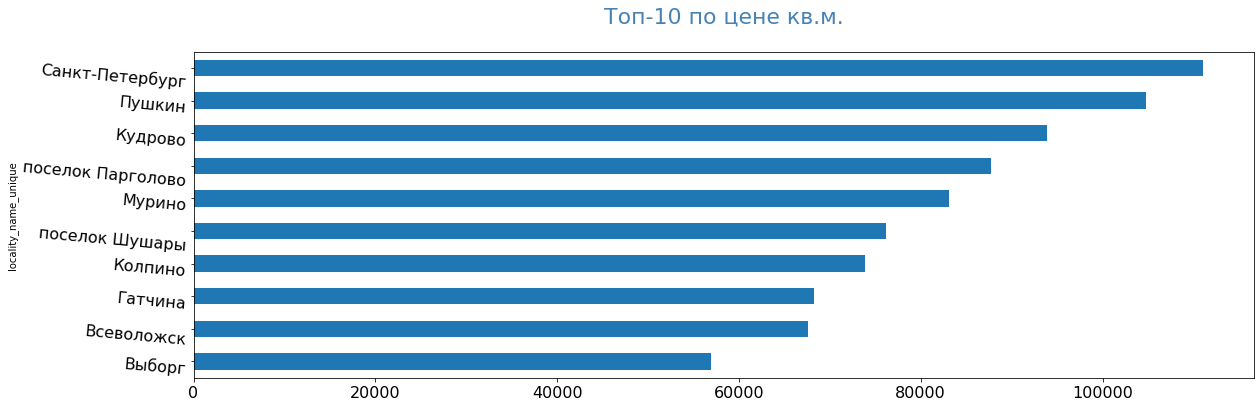

In [89]:
max_price_m2 = price_m2_in_location['price_m2'].max()
min_price_m2 = price_m2_in_location['price_m2'].min()

price_m2_in_location['price_m2'].sort_values().plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16) \
.set_title('Топ-10 по цене кв.м.' + "\n", fontsize = 22, color = 'SteelBlue');   

print('Самая высокая цена за квадратный метр в населённом пункте ', \
      price_m2_in_location.loc[price_m2_in_location['price_m2'] == max_price_m2, 'price_m2'])
print('')
print('Самая низкая цена за квадратный метр в населённом пункте ', \
      price_m2_in_location.loc[price_m2_in_location['price_m2'] == min_price_m2, 'price_m2'])

**4.5 Средняя цена каждого "километра до центра" в Санкт-Петербурге**

Найдём все объявления в Санкт-Петербурге и рассчитаем среднюю цену каждого километра:

Построим график зависимости стоимости квартиры от удаленности от центра:

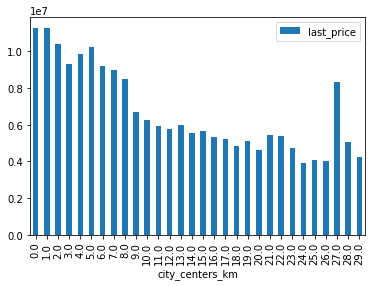

In [90]:
data_spb = data.query('locality_name_unique == "Санкт-Петербург"')
data_spb.pivot_table(index='city_centers_km',values='last_price').plot(y='last_price', kind='bar');

На графике видно, что чем дальше квартира от центра, тем ниже её стоимость. Есть несколько исключений.

Посмотрим, что привело к выбросу на 27-м км:

In [91]:
data_spb.query('city_centers_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_per_m2,weekday_of_exposition,month_of_exposition,year_of_exposition,type_of_floor,city_centers_km
691,13,14350000,74.00,2017-11-28,2,3.13,5,30.00,3,False,...,0.00,NaN,128.00,Санкт-Петербург,193918.92,1,11,2017,другой,27.00
5604,6,2250000,32.00,2018-02-27,1,NaN,2,16.50,2,False,...,0.00,NaN,178.00,Санкт-Петербург,70312.50,1,2,2018,последний,27.00


Всего два объявления, и объявление №691 о продаже двухкомнатной квартиры 74 кв.м. с ценой за кв.м. 194 тыс. руб. выбивается из общей статистики. Мы считали выше, что средняя цена кв.м. в Санкт-Петербурге составляет 111 тыс. руб., поэтому данное объявление, скорее всего, относится к элитной недвижимости.

На графике выше видно плавное снижение стоимости, однако есть несколько "пиков" и "провалов". Проверим предположение о том, что это зависит от этажа, на которых располагаются квартиры:

In [92]:
data_spb_2 = data_spb.pivot_table(index='city_centers_km',values='last_price',columns='type_of_floor',aggfunc='count')

data_spb_2.columns=['other','first','last']
data_spb_2['total']=data_spb_2['other']+data_spb_2['first']+data_spb_2['last']

data_spb_2['other,%'] = data_spb_2['other'] / data_spb_2['total']
data_spb_2['first,%'] = data_spb_2['first'] / data_spb_2['total']
data_spb_2['last,%'] = data_spb_2['last'] / data_spb_2['total']
data_spb_2.head()

,other,first,last,total,"other,%","first,%","last,%"
city_centers_km,,,,,,,
0.00,9.00,2.00,2.00,13.00,0.69,0.15,0.15
1.00,92.00,19.00,37.00,148.00,0.62,0.13,0.25
2.00,138.00,38.00,62.00,238.00,0.58,0.16,0.26
3.00,182.00,50.00,71.00,303.00,0.60,0.17,0.23
4.00,426.00,73.00,99.00,598.00,0.71,0.12,0.17


In [93]:
# check
data_spb.query('city_centers_km == 3')['type_of_floor'].value_counts(normalize=True).to_frame()

,type_of_floor
другой,0.60
последний,0.23
первый,0.17


In [94]:
# check
data_spb.query('city_centers_km == 5')['type_of_floor'].value_counts(normalize=True).to_frame()

,type_of_floor
другой,0.75
последний,0.15
первый,0.09


Построим графики, чтобы определить наличие зависимости:

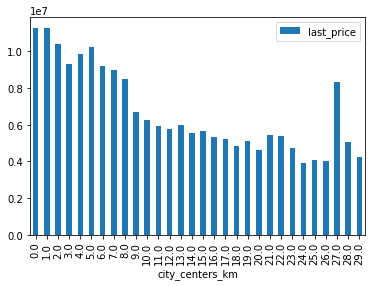

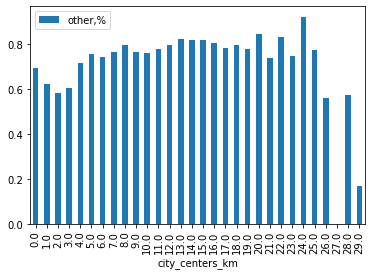

In [95]:
data_spb.pivot_table(index='city_centers_km',values='last_price').plot(y='last_price', kind='bar');
data_spb_2.plot(y='other,%', kind='bar');

График стоимости снижается плавно, однако есть несколько резких снижений и спадов. Сопоставив два графика выше видно, что снижение цены на 2-м и 3-м км совпадает со снижением доли продаваемых квартир на прочих этажах (не первом и не последнем), аналогично с ростом на 4-м и 5-м км.

**Вывод по разделу 4**: 

- Мы изучили параметры объектов, убедились в отсутствии "аномалий", сравнили и обосновали различие среднего и медианы. 

- Рассчитали скорость продажи квартир: "быстрая" продажа - до 7 дней, обычная продажа - до полугода, необычно долгая - свыше полугода.

- Определили факторы, влияющие на стоимость объекта: в первую очереь это площадь (общая, жилая, площадь кухни) и количество комнат.

- Выделили топ-10 населённых пунктов по количеству объявлений и рассчитали стоимость квадратного метра в них (топ-3: Санкт-Петербург, Пушкин, Кудрово)

- Рассчитали среднюю цену каждого километра до центра в Санкт-Петербурге.

### Общий вывод

Мы получили данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Мы выполнили **предобработку данных**, а именно:
- удалили строки с пустыми значениями "Населённый пункт" и "Всего этажей в доме";
- заполнили нулями ячейки, где были пропущены значения "Количество балконов", "Количество парков поблизости", "Количество прудов поблизости";
- объединили дублирующие названия населённых пунктов;
- удалили аномальные значения, оставив квартиры:
     - с ценой от 500 тыс. руб. до 30 млн руб.;
     - с жилой площадью 20 до 200 кв.м. и площадью кухни от 3 до 30 кв.м.;
     - от одной до 5-ти комнат;
     - с потолками от 2.5 до 3.6 м;
     - в домах с этажностью до 30-ти;
     - с расположением более 5 км от аэропорта;
     - объявление о продаже которой находилось менее трёх лет.
Из 23699 строк осталось 22317, удалено 5,8% от исходного файла, что некритично для целей исследования.

Далее был выполнен **исследовательский анализ данных**:
1. Изучили параметры объектов. Интересные наблюдения:
     - средняя общая площадь - 57 кв.м., медиана - 51 кв. м. (смещение засчет объявлений с большой площадью);
     - средняя жилая площадь - 33 кв.м.; медиана - 30 (также есть пик около 20 кв. м.);
     - средняя площадь кухни - 10 кв. м.; два пика - 5 и 8 кв. м. (возможно, обусловлено частовстречающимися планировками);
     - средняя цена - 5,55 млн руб; медиана - 4,6 млн руб. (засчет дорогостоящей недвижимости);
     - количество комнат: преимущественно 1 и 2;
     - высота потолков - пик и среднее приходятся на 2.5-2.7 м, что соотвествует современной застройке;
     - этаж квартиры - большинство квартир находятся на этаже с первого по пятый, на первом и последнем этажах расположено примерно одинаковое количество квартир (12% и 14% соотвественно), 74% на других этажах;
     - более половины квартир из 5-ти и 9-ти этажных домов;
     - большинство квартир из объявлений располагаются в 11-16 км от центра, в 10-30 км от аэропорта и менее чем в 1 км до ближайшего парка;
     - всего 15% объявлений публикуются на выходных, в будни самые популярные дни - вторник и четверг;
     - чаще всего публикуются объявления с февраля по апрель, ещё один пик приходится на осень. Реже всего - январь, май и декабрь.

2. Проанализировали скорость продажи квартир. Быстрая продажа - до 45-ти дней, обычная продажа - от 45 до 180 дней, необычно долгая продажа - от полугода до трёх лет (четверть объявлений).

3. Выявили факторы, влияющие на стоимость объекта: площадь (общая площадь, жилая площадь и площадь кухни) и количество комнат.

4. Выделили топ-10 населённых пунктов по количеству объявлений и рассчитали стоимость квадратного метра в них (топ-3: Санкт-Петербург - 112 тыс. руб., Пушкин - 105 тыс. руб., Кудрово - 94 тыс. руб.)

5. Рассчитали среднюю цену каждого километра до центра в Санкт-Петербурге: от 11 млн руб. в центре, до 4,2 млн на 30-м км от центра.